In [1]:
import numpy as np
import scipy
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv3D,MaxPooling3D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
import keras
#from sklearn.cross_validation import StratifiedKFold

Using TensorFlow backend.


In [2]:
PATH = os.getcwd()
print (PATH)

/home/dkoder/deep_learning_practice/hyperspectral imaging/final year project/codes/Classification-of-Hyperspectral-Image-master


In [36]:
# Global Variables
windowSize = 7
numPCAcomponents = 64
testRatio = 0.95

# Load Training Dataset

In [349]:
X_train = np.load("../../data/XtrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + ".npy")

y_train = np.load("../../data/ytrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + ".npy")

In [37]:
X_train = np.load("../../data/XtrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + "_dost.npy")

y_train = np.load("../../data/ytrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + "_dost.npy")

In [17]:
X_train = np.load("../../data/XtrainWindowSize" 
                  + str(windowSize)  + ".npy")

y_train = np.load("../../data/ytrainWindowSize" 
                  + str(windowSize) + ".npy")

In [38]:
# Reshape into (numberofsumples, channels, height, width)
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[3], X_train.shape[1], X_train.shape[2]))

In [39]:
# convert class labels to on-hot encoding
y_train = np_utils.to_categorical(y_train)

In [40]:
# Define the input shape 
input_shape= X_train[...][0].shape
print(input_shape)

(64, 7, 7)


In [41]:
# number of filters
C1 = 64

In [64]:
# Define the model
model = Sequential()

model.add(Conv2D(2*C1, (3, 3),data_format="channels_last", activation='relu', input_shape=input_shape))
model.add(Dropout(0.4))
# model.add(MaxPooling3D(pool_size=()))
model.add(Conv2D(C1, (3, 3), data_format="channels_last",activation='relu'))
model.add(Dropout(0.4))
# model.add(MaxPooling3D((2,2,2)))
# model.add(Conv3D(C1, (2,3, 3), activation='relu'))
# model.add(Dropout(0.25))





model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [65]:
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [66]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 5, 5)         73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 5, 5)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 3, 3)          73792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 3, 3)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               147712    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
__________

In [67]:
history = model.fit(X_train,
    y_train,
    batch_size=16,
    epochs=100,
    #show_accuracy=False,
#     verbose=2,
#     validation_split = 0.1,
#     callbacks = [
#         keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
#         keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='auto'),
#         keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

    )

Epoch 1/100
1981/1981 [==============================] - 2s 909us/step - loss: 3.0163 - acc: 0.0697
Epoch 2/100
1981/1981 [==============================] - 2s 758us/step - loss: 2.7553 - acc: 0.1166
Epoch 3/100
1981/1981 [==============================] - 1s 746us/step - loss: 2.6386 - acc: 0.1676
Epoch 4/100
1981/1981 [==============================] - 1s 754us/step - loss: 2.5675 - acc: 0.2029
Epoch 5/100
1981/1981 [==============================] - 1s 754us/step - loss: 2.4877 - acc: 0.2393
Epoch 6/100
1981/1981 [==============================] - 1s 747us/step - loss: 2.3856 - acc: 0.2786
Epoch 7/100
1981/1981 [==============================] - 1s 751us/step - loss: 2.3241 - acc: 0.2882
Epoch 8/100
1981/1981 [==============================] - 2s 822us/step - loss: 2.2375 - acc: 0.3256
Epoch 9/100
1981/1981 [==============================] - 2s 767us/step - loss: 2.1754 - acc: 0.3433
Epoch 10/100
1981/1981 [==============================] - 1s 741us/step - loss: 2.1001 - acc: 0.3529

In [87]:
# history = model.fit(X_train,
#     y_train,
#     batch_size=64,
#     epochs=400,
#     #show_accuracy=False,
# #     verbose=2,
#     validation_split = 0.1,
#     initial_epoch=300,
#     callbacks = [
# #         keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
#         keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='auto'),
#         keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
#     ])

In [46]:
import h5py
from keras.models import load_model
import time

In [47]:
print('my_model_pca_'+str(testRatio)+str(numPCAcomponents)+str(windowSize)+str(time.strftime("%Y-%m-%d %H:%M"))+'.h5')

my_model_pca_0.956472018-09-11 16:35.h5


In [48]:
filename = 'my_model_pca_'+str(testRatio)+str(numPCAcomponents)+str(windowSize)+str(time.strftime("%Y-%m-%d %H:%M"))+'_dost.h5'
print(filename)
model.save(filename)

my_model_pca_0.956472018-09-11 16:35_dost.h5


In [17]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import os
import scipy.io as sio
import numpy as np
from keras.models import load_model
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import spectral
import scipy as sp
from scipy import fftpack

In [18]:
# Global Variables
windowSize = 7
numPCAcomponents = 64
testRatio = 0.95

In [49]:
def loadIndianPinesData():
    data_path = os.path.join(os.getcwd(),'data')
    data = sio.loadmat("../../../Datasets/Indian pines/Indian_pines_corrected.mat")['indian_pines_corrected']
    labels = sio.loadmat("../../../Datasets/Indian pines/Indian_pines_gt.mat")['indian_pines_gt']
    
    return data, labels

def reports (X_test,y_test,model):
    Y_pred = model.predict(X_test,batch_size=8)
    y_pred = np.argmax(Y_pred, axis=1)
    target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
               ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
               'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
               'Stone-Steel-Towers']

    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=8)
    Test_Loss =  score[0]*100
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy


def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

def Patch(data,height_index,width_index):
    #transpose_array = data.transpose((2,0,1))
    #print transpose_array.shape
    height_slice = slice(height_index, height_index+PATCH_SIZE)
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    
    return patch

In [80]:
X_test = np.load("../../data/XtestWindowSize" 
                 + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + "_dost.npy")
y_test = np.load("../../data/ytestWindowSize" 
                 + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + "_dost.npy")

In [81]:
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[3], X_test.shape[1], X_test.shape[2]))
y_test_ = np_utils.to_categorical(y_test)

In [384]:
# load the model architecture and weights
model = load_model(filename)

In [69]:
classification, confusion, Test_loss, Test_accuracy = reports(X_test,y_test_,model)
classification = str(classification)
confusion = str(confusion)
numComponents = 64
file_name = 'report' + "WindowSize" + str(windowSize) + "PCA" + str(numComponents) + "testRatio" + str(testRatio) +"_dost.txt"
with open(file_name, 'w+') as x_file:
    x_file.write('{} Test loss (%)'.format(Test_loss))
    x_file.write('\n')
    x_file.write('{} Test accuracy (%)'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{}'.format(classification))
    x_file.write('\n')
    x_file.write('{}'.format(confusion))

9737/9737 [==============================] - 4s 400us/step


In [70]:
# load the original image
Xt, y = loadIndianPinesData()

In [71]:

def dost_bw(l):
    out = np.zeros(int(2*np.log2(l)))
    l1 = np.arange(np.log2(l)-2,-1,-1)
    l2 = np.arange(0,np.log2(l)-1)
    out[1:int(1+np.log2(l)-1)]=l1
    out[-int(np.log2(l)-1):]=l2
    
    out = np.exp2(out).astype(np.int16)
    return out

def dost(inp):
    l = inp.shape[0]
    fft_inp = fftpack.fftshift(fftpack.fft(fftpack.ifftshift(inp,axes=0),axis=0),axes=0)
    #plt.figure(figsize = (30,5))
    #ax = np.linspace(-512,511,2**10)
    #plt.plot(ax,fft_inp[0,:])
    bw_inp = dost_bw(l)
#     print(bw_inp)
    k = 0
    dost_inp = np.zeros_like(fft_inp)

    for r in bw_inp:
        if(r==1):
            dost_inp[k,:] = fft_inp[k,:]
            k = k+r
        else:
            dost_inp[k:r+k,:] = fftpack.fftshift(fftpack.ifft(fftpack.ifftshift(fft_inp[k:r+k,:],axes=0),axis=0),axes=0)
            k = k+r

#     plt.plot(fft_inp)
    #plt.figure(figsize = (20,5))
    #plt.plot(np.abs(dost_inp[0,:]))
    
    
    return dost_inp
    

In [72]:
Xn = np.zeros([Xt.shape[0],Xt.shape[1],256])
Xn[:,:,:200] = Xt

In [73]:
Xn = dost(Xn.reshape([-1,Xn.shape[2]],order='F').T).T.reshape(Xn.shape,order='F')

In [74]:
height = y.shape[0]
width = y.shape[1]
PATCH_SIZE = 7
numComponents = 64

In [75]:
X,pca = applyPCA(Xn,numComponents=numComponents)

/home/dkoder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [76]:
# calculate the predicted image
output_classes = np.zeros((height,width))
# output_prob = np.zeros((height,width,16))
for i in range(height-PATCH_SIZE+1):
    for j in range(width-PATCH_SIZE+1):
        target = int(y[i+PATCH_SIZE//2, j+PATCH_SIZE//2])
        if target == 0 :
            continue
        else :
            image_patch=Patch(X,i,j)
            #print (image_patch.shape)
            X_test_image = image_patch.reshape(1,image_patch.shape[2],image_patch.shape[0],image_patch.shape[1]).astype('float32')                                   
            prediction = (model.predict_classes(X_test_image,batch_size = 8))                         
            output_classes[i+PATCH_SIZE//2][j+PATCH_SIZE//2] = prediction+1
#             prediction = (model.predict_proba(X_test_image,batch_size = 8))                         
#             output_prob[i+PATCH_SIZE//2,j+PATCH_SIZE//2,:] = prediction

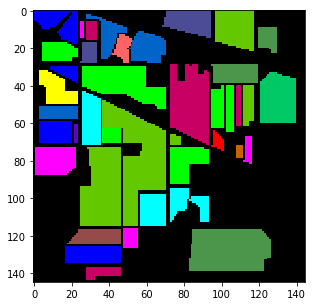

In [408]:
ground_truth = spectral.imshow(classes = y,figsize =(5,5))

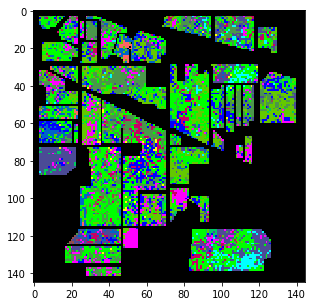

In [77]:
predict_image = spectral.imshow(classes = output_classes.astype(int),figsize =(5,5))

In [1]:
!pip install spectral

  Running setup.py bdist_wheel for spectral: started
  Running setup.py bdist_wheel for spectral: finished with status 'done'
  Stored in directory: C:\Users\debakanta kar\AppData\Local\pip\Cache\wheels\93\7e\15\a200ebb0b557d54eb396234737f9593ce705ed98a954bf148b
Successfully built spectral


In [78]:
output_classes[10,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2., 10.,  2.,  2.,  2.,  2.,  2.,  2., 11.,  2.,  0., 12.,
        5.,  0.,  5., 14., 14., 14., 14., 14.,  0.,  0.,  5., 14., 14.,
       15.,  2., 14., 14., 10.,  2.,  2., 10.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        2., 14., 14., 12., 11., 12., 14., 12., 11., 14., 14.,  2., 12.,
       15.,  2.,  2.,  6.,  0.,  0., 15.,  3., 14., 14., 15.,  2.,  2.,
        6., 14., 14., 14., 15., 15., 15.,  6.,  5.,  2., 11.,  2., 14.,
        2.,  0.,  0., 15., 15., 14., 14., 14., 14.,  2.,  3.,  3., 11.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [79]:
#dost based
predict_image = spectral.imshow(classes = outputs.astype(int),figsize =(5,5))

NameError: name 'outputs' is not defined

In [113]:
output_prob.shape

(145, 145, 16)

In [129]:
def wls_filter(img,lambda_,alpha,L):
    
    epsilon = 1e-4
    (r,c)=img.shape
    k = r*c
    
    dy = np.diff(L,1,0)
    dy = -lambda_/(np.power(np.abs(dy),alpha)+epsilon)
    dy = np.lib.pad(dy,[(0,1),(0,0)],'constant',constant_values=0)
    dy = dy.flatten('F')
    
    dx = np.diff(L,1,1)
    dx = -lambda_/(np.power(np.abs(dx),alpha)+epsilon)
    dx = np.lib.pad(dx,[(0,0),(0,1)],'constant',constant_values=0)
    dx = dx.flatten('F')
    
    B = np.array([dx,dy])
    A = sp.sparse.diags(B,[-r,-1],(k,k))
    
    e = dx
    w = np.pad(dx,[(r,0)],'constant',constant_values=0)[:-r]
    s = dy
    n = np.pad(dy,[(1,0)],'constant',constant_values=0)[:-1]
    
    D = 1-(e+w+s+n)
    
    A = A + A.T + sp.sparse.diags(D.reshape(1,-1),[0],(k,k))
    
    result = sp.sparse.linalg.spsolve(A,img.reshape((-1,1),order = 'F'))
    result = result.reshape((r,c),order='F')
    
    return result


#%%
def bt_wls(Y,prediction,errMat,lamda_,alpha):
    
    (m,n)=prediction.shape
    bands = Y.shape[2]
#     Y = Y.reshape((m,n,bands),order = 'F')
    
    numClasses = errMat.shape[2]
#     errCube = errMat.reshape((m,n,numClasses),order = 'F')
    errCube = errMat[...]
    errCube = (errCube-np.min(errCube))/(np.max(errCube)-np.min(errCube))
    
    guidanceImage = applyPCA(Y,1)[0].reshape((m,n)) 
    
    #guidanceImage = np.mean(np.log(Y.astype(np.double)+0.0001),2)
    for i in range(numClasses):
        slc = errCube[:,:,i]
        slc[np.logical_not(prediction==i+1)]=1
        slc = wls_filter(slc,lamda_,alpha,guidanceImage)
        errCube[:,:,i]=slc
       
    new_prediction = np.argmin(errCube,2)+1
    new_prediction[prediction==0] = 0
    return new_prediction   

In [347]:
pred_dost = bt_wls(Xt,output_classes,output_prob,0.3,0.8)

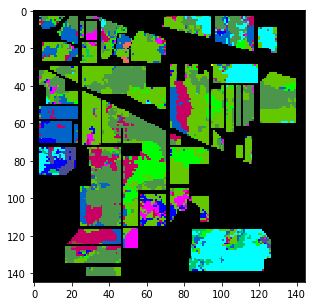

In [348]:
#dost_wls
predict_image = spectral.imshow(classes = pred_dost.astype(int),figsize =(5,5))

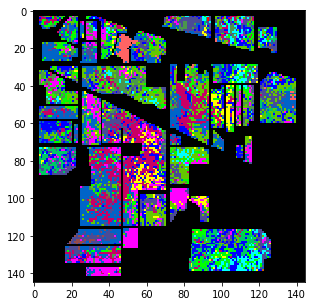

In [241]:
#dost based
predict_image = spectral.imshow(classes = output_classes.astype(int),figsize =(5,5))

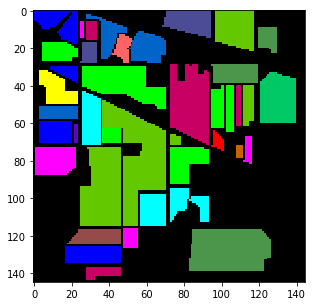

In [216]:
ground_truth = spectral.imshow(classes = y,figsize =(5,5))

In [86]:
np.sum(y[y!=0]==output_classes[y!=0])


1068